## NASA API 

In this checkpoint, I am going to practice consuming public APIs through the NASA public APIs portal.

Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals. Before starting to use its APIs endpoints, it's mandatory that you generate your API KEY and store it somewhere for later use. The API key acts as the user identifier when requesting the API. To get your KEY, fill in the provided form with your personal information, and then we shall receive an email containing your personal API KEY.

➡️ NASA API PORTAL

https://i.imgur.com/hisTmpk.png

 


**Instructions**

1. Go to the NASA API portal and generate your API KEY
2. Import the requests package and store your API KEY in variable
3. Go back to portal website and click on 'browse APIs'
4. Click on the first dropdown menu, named 'APOD' and read its documentation
5. Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on your notebook.
6. Go through the list of the provided API endpoints once again and select 'Astronomy Picture of the Day' option. Store the results in a pandas dataframe
7. Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
- Asteroid ID
- Asteroid name
- The Minimal estimated diameter in Kilometre
- Absolute_magnitude
- Relative_velocity(km/s)


In [1]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
# The base URL of the API endpoint
url = "https://api.nasa.gov/planetary/apod"

In [5]:
# Your API key
api_key = "c6Ks0kIf3GEi6HkUfunisY8bGGAI0SD90aQ2hWeJ"

In [7]:
# Parameters for the API request, including the API key
params = {
    'api_key': api_key
}

In [9]:
# Send a GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
response.status_code == 200

True

In [11]:
# Display the weather data as JSON
response.json()

{'copyright': '\nDavide Caliò\n',
 'date': '2025-02-24',
 'explanation': "Can a lava flow extend into the sky? No, but light from the lava flow can. One effect is something quite unusual -- a volcanic light pillar. More typically, light pillars are caused by sunlight and so appear as a bright column that extends upward above a rising or setting Sun. Alternatively, other light pillars -- some quite colorful -- have been recorded above street and house lights. This light pillar, though, was illuminated by the red light emitted by the glowing magma of an erupting volcano. The volcano is Italy's Mount Etna, and the featured image was captured with a single shot during an early morning in mid-February. Freezing temperatures above the volcano's lava flow created ice-crystals either in the air above the volcano or in condensed water vapor expelled by Mount Etna. These ice crystals -- mostly flat toward the ground but fluttering -- then reflected away light from the volcano's caldera.",
 'hdur

In [13]:
data = response.json()

In [15]:
# Get the image URL
image_url = data['url']

In [17]:
# Request the image
img_response = requests.get(image_url)

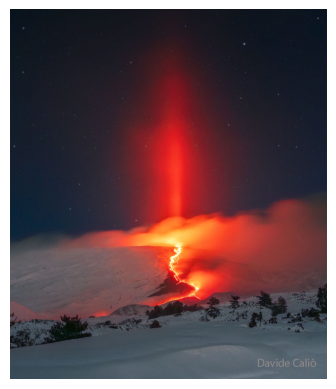

Title: Light Pillar over Erupting Etna
Date: 2025-02-24
Explanation: Can a lava flow extend into the sky? No, but light from the lava flow can. One effect is something quite unusual -- a volcanic light pillar. More typically, light pillars are caused by sunlight and so appear as a bright column that extends upward above a rising or setting Sun. Alternatively, other light pillars -- some quite colorful -- have been recorded above street and house lights. This light pillar, though, was illuminated by the red light emitted by the glowing magma of an erupting volcano. The volcano is Italy's Mount Etna, and the featured image was captured with a single shot during an early morning in mid-February. Freezing temperatures above the volcano's lava flow created ice-crystals either in the air above the volcano or in condensed water vapor expelled by Mount Etna. These ice crystals -- mostly flat toward the ground but fluttering -- then reflected away light from the volcano's caldera.


In [18]:
# Open the image and display it using matplotlib
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)
plt.axis('off')
plt.show()
# Display the image and some info
print("Title:", data['title'])
print("Date:", data['date'])
print("Explanation:", data['explanation'])

In [19]:
neo_url = "https://api.nasa.gov/neo/rest/v1/feed"

In [23]:
# Parameters for the API request (retrieves asteroids for a range of dates)
neo_params = {
    'start_date': '2023-10-01',  # Specify the date range you want
    'end_date': '2023-10-02',
    'api_key': api_key
}

In [25]:
# Send a GET request to the NeoWs API
neo_response = requests.get(neo_url, params=neo_params)

In [26]:
# Check if the request was successful
if neo_response.status_code == 200:
    neo_data = neo_response.json()
    
    # Extract the asteroid data from the response
    asteroids = []
    for date, neo_objects in neo_data['near_earth_objects'].items():
        for obj in neo_objects:
            asteroid = {
                'Asteroid ID': obj['id'],
                'Asteroid Name': obj['name'],
                'Minimal Estimated Diameter (km)': obj['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Absolute Magnitude': obj['absolute_magnitude_h'],
                'Relative Velocity (km/s)': obj['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
            }
            asteroids.append(asteroid)
    
    # Create a pandas DataFrame from the extracted data
    df = pd.DataFrame(asteroids)
    
    # Display the DataFrame
    print(df)
    
else:
    print(f"Error: {neo_response.status_code}")

   Asteroid ID        Asteroid Name  Minimal Estimated Diameter (km)  \
0      2137084   137084 (1998 XS16)                         1.344482   
1      2252399   252399 (2001 TX44)                         0.348783   
2      3342645           (2006 SG7)                         0.071871   
3      3451020           (2009 EG3)                         0.145397   
4      3606252            (2012 OO)                         0.197950   
5      3740047         (2016 AM165)                         0.030518   
6      3888755          (2019 UQ12)                         0.046191   
7     54016425           (2020 FW6)                         0.060333   
8     54016634           (2020 HO2)                         0.036691   
9     54217963           (2021 VA6)                         0.004514   
10    54244779           (2022 CB1)                         0.014878   
11    54304629            (2022 SW)                         0.024920   
12    54380190          (2023 QB10)                         0.11

In [27]:
df.head()

,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s)
0,2137084,137084 (1998 XS16),1.344482,16.48,18.0203377818
1,2252399,252399 (2001 TX44),0.348783,19.41,13.1737646759
2,3342645,(2006 SG7),0.071871,22.84,11.2074516962
3,3451020,(2009 EG3),0.145397,21.31,19.7494474735
4,3606252,(2012 OO),0.197950,20.64,9.4421469919
